
Checking for Missing Values:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      22
Region            8
Product ID        0
Category          4
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


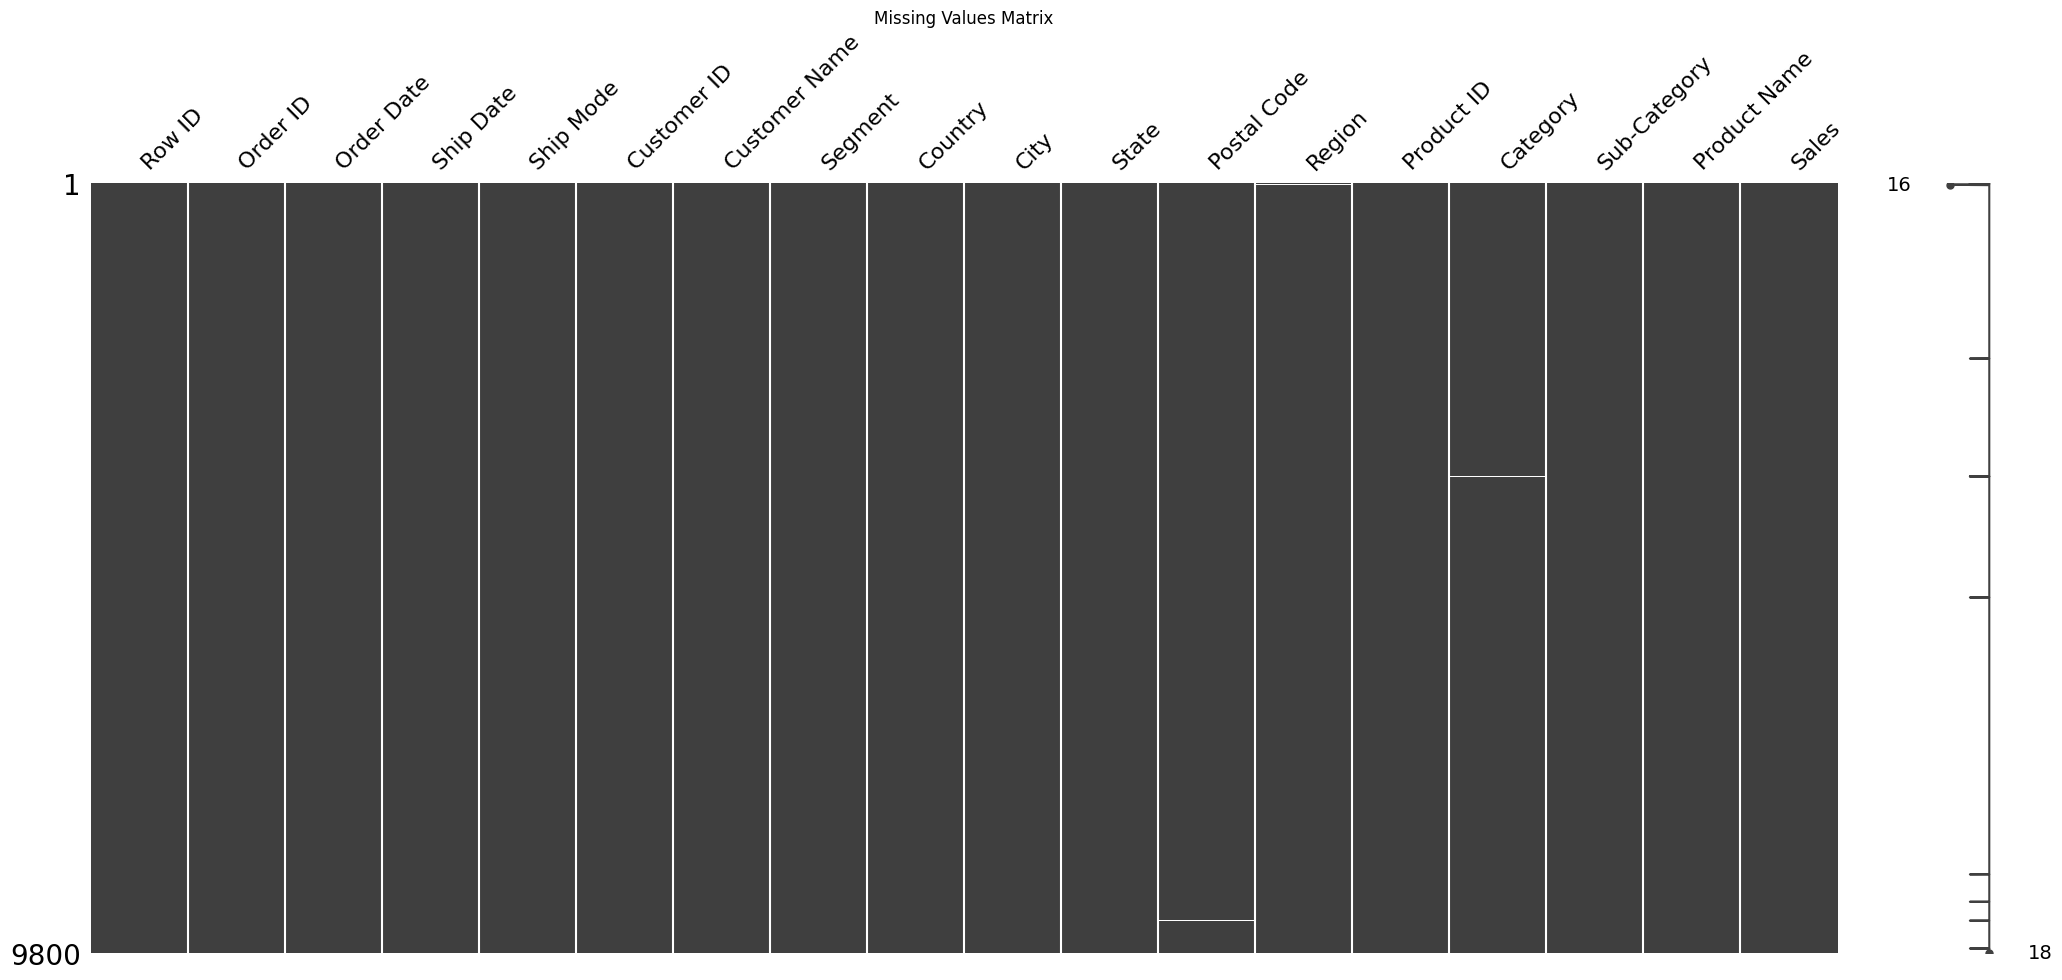


Number of Duplicate Rows: 0

Cleaned Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9792 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9796 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Load the Dataset
file_path = '/content/sales.csv'  # Update with your actual file path
data = pd.read_csv(file_path)

# Check for null values
print("\nChecking for Missing Values:")
print(data.isnull().sum())

# Step 2: Visualize Missing Values
msno.matrix(data)
plt.title("Missing Values Matrix")
plt.show()

# Step 3: Handle Missing or Invalid Values
# Replace invalid/missing values in numeric columns with NaN and fill with median
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    data[col] = data[col].replace(0, None)  # Replace 0s if considered invalid
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Step 4: Remove Duplicate Rows
duplicates = data.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")
data = data.drop_duplicates()

# Summary of cleaned data
print("\nCleaned Data Information:")
print(data.info())
print("\nSample Cleaned Data:\n", data.head())

# Step 5: Feature Normalization and Target Separation
# Example: Assuming 'Sales' is the target variable
target_column = 'Sales'
features = data.drop(columns=[target_column])  # Drop target column
target = data[target_column]

# # Normalize numerical features
# scaler = StandardScaler()
# features[numeric_columns] = scaler.fit_transform(features[numeric_columns])

# Step 6: Split Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Check the split
print(f"\nTraining Set Shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing Set Shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

